## Testing CIFAR10N With Different Source Bins:

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import graph_code

In [2]:
width = 7.1413

In [3]:
test_results_file_path = './outputs/cifarn_results/'
graph_outputs_file_path = './outputs/graphs/'

In [4]:
files = [
    'CIFAR10N_results_1024.csv',
    'CIFAR10N_results_128.csv',
    'CIFAR10N_results_16.csv',
    'CIFAR10N_results_2.csv',
    'CIFAR10N_results_256.csv',
    'CIFAR10N_results_32.csv',
    'CIFAR10N_results_4.csv',
    'CIFAR10N_results_512.csv',
    'CIFAR10N_results_64.csv',
    'CIFAR10N_results_8.csv',
    ]

In [5]:
dep_strength_to_model = {0: 'Standard Model', 1:'LAP Model (Ours)'}

In [6]:
# loading results -----------------------------------------
results = pd.DataFrame()
for file in files:
    results = pd.concat(
                [
                    results, 
                    pd.read_csv(test_results_file_path + file, index_col=0)
                    ]
                )
results = results.reset_index(drop=True)

In [7]:
# cleaning results -----------------------------------------
results['Model Name'] = results['Depression Strength'].map(dep_strength_to_model)
idx_no_corruption = (results['Number of Corrupted Sources'] == 0) & (results['Noise Level'] == 0)
results.loc[idx_no_corruption, 'Model Name'] = 'Standard Model - Clean Data'
clean_results = (results
    .loc[idx_no_corruption]
    .drop(['Number of Corrupted Sources', 'Noise Level'], axis=1)
    )
results = results.loc[~idx_no_corruption]
n_corruption_list = results['Number of Corrupted Sources'].unique()
noise_level_list = results['Noise Level'].unique()

for n_corruption, noise_level  in itertools.product(n_corruption_list, noise_level_list):
    clean_results_temp = clean_results.assign(
            **{
                'Number of Corrupted Sources': n_corruption,
                'Noise Level': noise_level,
                }
            )
    clean_results_temp = clean_results_temp[results.columns]
    results = pd.concat([results, clean_results_temp])

results['Value'] = results['Value']*100

results = results.rename({'Value': 'Accuracy (%)'}, axis=1)

C:\Users\Alex Capstick\anaconda3\envs\dcarte\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


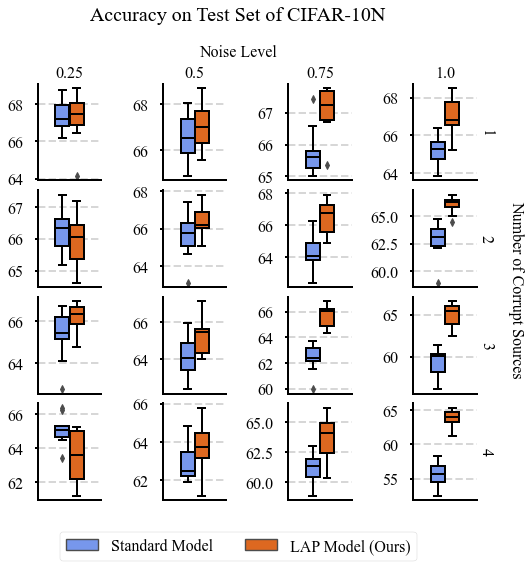

In [8]:
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['xtick.major.width'] = 0
plt.rcParams['ytick.major.width'] = 2


with graph_code.paper_theme():
    g = sns.FacetGrid(
        data=(results
            .query(
                "Context == 'Test'"\
                " & Metric == 'Accuracy'"
                " & `Model Name` in ['Standard Model', 'LAP Model (Ours)']"
                )
            ),
        row='Number of Corrupted Sources',
        col='Noise Level',
        margin_titles=True,
        height=8*0.8/4,
        aspect=7.1413/8,
        sharey=False,
        legend_out=False
        )
    g.map_dataframe(
        graph_code.boxplot, 
        x='Metric',
        y='Accuracy (%)',
        hue='Model Name',
        hue_order=[
            'Standard Model', 
            'LAP Model (Ours)', 
            #'Standard Model - Clean Data'
            ],
        palette={
            'Standard Model': '#648eff', 
            'LAP Model (Ours)': '#fd6000', 
            'Standard Model - Clean Data': '#917cf1', 
            },
        width=0.45,
        )

    g.set(xlabel=None, xticklabels=[], xticks=[])
    g.set(ylabel=None)
    g.set_titles(
        col_template="{col_name}", 
        row_template="{row_name}",
        size=16,
        )
    g.fig.text(
        x=0.5,
        y=0.96,
        s='Noise Level',
        fontsize=16,
        va='center',
        ha='center',
        )

    g.fig.text(
        x=1.04,
        y=0.5,
        rotation=270,
        s='Number of Corrupt Sources',
        fontsize=16,
        va='center',
        ha='center',
        )

    g.fig.subplots_adjust(top=0.9, hspace=0.1)
    g.fig.suptitle(
        'Accuracy on Test Set of CIFAR-10N',
        fontsize=20,
        y=1.05,
        )
    
    g.fig.set_size_inches(width, width)
    g.add_legend(
        loc='center', 
        ncol=2, 
        bbox_to_anchor=[0.5, 0],
        bbox_transform=g.figure.transFigure
        )

file_name = graph_outputs_file_path + 'CIFAR10N_human_labelled_test'
graph_code.save_fig(g.figure, file_name)

C:\Users\Alex Capstick\anaconda3\envs\dcarte\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


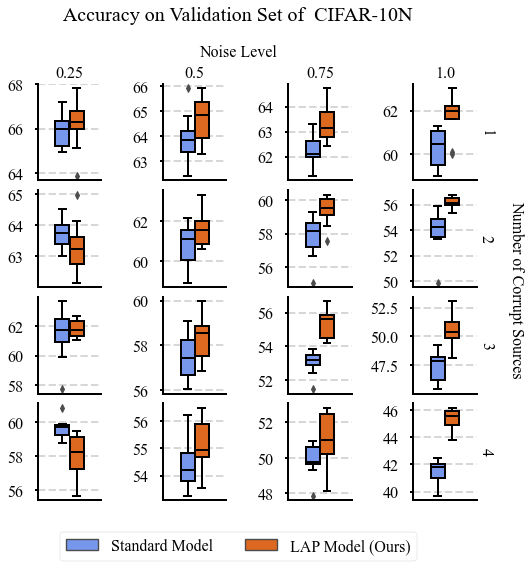

In [9]:
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['xtick.major.width'] = 0
plt.rcParams['ytick.major.width'] = 2


with graph_code.paper_theme():
    g = sns.FacetGrid(
        data=(results
            .query(
                "Context == 'Validation'"\
                " & Metric == 'Accuracy'"
                " & `Model Name` in ['Standard Model', 'LAP Model (Ours)']"
                )
            ),
        row='Number of Corrupted Sources',
        col='Noise Level',
        margin_titles=True,
        height=8*0.8/4,
        aspect=7.1413/8,
        sharey=False,
        legend_out=False
        )
    g.map_dataframe(
        graph_code.boxplot, 
        x='Metric',
        y='Accuracy (%)',
        hue='Model Name',
        hue_order=[
            'Standard Model', 
            'LAP Model (Ours)', 
            #'Standard Model - Clean Data'
            ],
        palette={
            'Standard Model': '#648eff', 
            'LAP Model (Ours)': '#fd6000', 
            'Standard Model - Clean Data': '#917cf1', 
            },
        width=0.45,
        )

    g.set(xlabel=None, xticklabels=[], xticks=[])
    g.set(ylabel=None)
    g.set_titles(
        col_template="{col_name}", 
        row_template="{row_name}",
        size=16,
        )
    g.fig.text(
        x=0.5,
        y=0.96,
        s='Noise Level',
        fontsize=16,
        va='center',
        ha='center',
        )

    g.fig.text(
        x=1.04,
        y=0.5,
        rotation=270,
        s='Number of Corrupt Sources',
        fontsize=16,
        va='center',
        ha='center',
        )

    g.fig.subplots_adjust(top=0.9, hspace=0.1)
    g.fig.suptitle(
        'Accuracy on Validation Set of  CIFAR-10N',
        fontsize=20,
        y=1.05,
        )
    g.fig.set_size_inches(width, width)
    g.add_legend(
        loc='center', 
        ncol=2, 
        bbox_to_anchor=[0.5, 0],
        bbox_transform=g.figure.transFigure
        )

file_name = graph_outputs_file_path + 'CIFAR10N_human_labelled_val'
graph_code.save_fig(g.figure, file_name)

## Loss Distributions:

In [10]:
tbl = graph_code.TensorboardLoad('./runs/C3N-cifar10N-ds_1-ln_25-stn_0.8-ho_0-ncs_4-nl_1-sd_2')

In [11]:
results = tbl.scalars()[1]

Loading Files: 100%|▉▉▉▉▉▉▉▉▉▉| 31/31 [00:01<00:00, 16.01it/s]


In [12]:
results = graph_code.clean_tb(results)

Deemed unreliable sources:

In [13]:
print((results
    .query("tag.str.contains('Depression')"\
        " & Step > 500"\
        " & Step <= 525"\
        " & Value < 1"
        )
    )['Source'].unique())

[3 2 1 0]


In [14]:
unreliable_sources = [0, 1, 2, 3]

In [15]:
late_loss_reliable = (results
    .query("tag.str.contains('Training Source Loss')"\
        " & Source not in @unreliable_sources"\
        " & Step > 25"\
        " & Step <= 50"
        )
    .copy()
    )

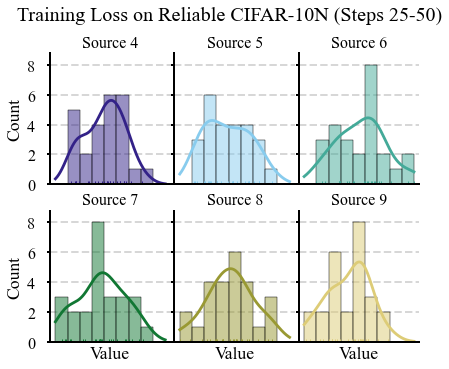

In [16]:
with graph_code.paper_theme():

    g = sns.displot(
        data=late_loss_reliable, 
        x='Value', 
        hue='Source', 
        col='Source', 
        kde=True,
        palette=graph_code.tol_muted[:6], 
        rug=True, 
        legend=False,
        col_wrap=3,
        aspect=0.8,
        height=width/0.8,
        )

    g.set(xticks=[])
    g.set_titles(
        "Source {col_name}",
        size=16,
        )
    g.fig.subplots_adjust(top=0.85, hspace=0.2)
    g.fig.suptitle(
        'Training Loss on Reliable CIFAR-10N (Steps 25-50)',
        fontsize=20,
        )
    g.fig.set_size_inches(width*0.75, width*0.7)

file_name = graph_outputs_file_path + 'CIFAR10N_loss_dis_reliable_25_50'
graph_code.save_fig(g.figure, file_name)


In [17]:
late_loss_unreliable = (results
    .query("tag.str.contains('Training Source Loss')"\
        " & Source in @unreliable_sources"\
        " & Step > 25"\
        " & Step <= 50"
        )
    .copy()
    )

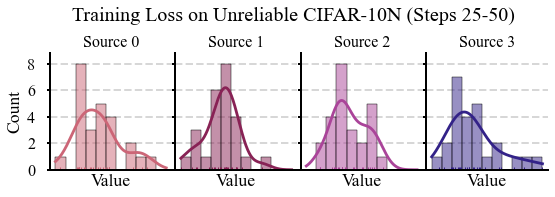

In [18]:
with graph_code.paper_theme():

    g = sns.displot(
        data=late_loss_unreliable, 
        x='Value', 
        hue='Source', 
        col='Source', 
        kde=True,
        palette=graph_code.tol_muted[6:] + [graph_code.tol_muted[0]], 
        rug=True, 
        legend=False,
        col_wrap=4,
        aspect=0.8,
        height=width/0.8,
        )

    g.set(xticks=[])
    g.set_titles(
        "Source {col_name}",
        size=16,
        )
    g.fig.subplots_adjust(top=0.85, hspace=0.2)
    g.fig.suptitle(
        'Training Loss on Unreliable CIFAR-10N (Steps 25-50)',
        fontsize=20,
        y=1.15,
        )
    
    g.fig.set_size_inches(width, width*0.3)


file_name = graph_outputs_file_path + 'CIFAR10N_loss_dis_unreliable_25_50'
graph_code.save_fig(g.figure, file_name)

In [19]:
late_loss_reliable = (results
    .query("tag.str.contains('Training Source Loss')"\
        " & Source not in @unreliable_sources"\
        " & Step > 500"\
        " & Step <= 525"
        )
    .copy()
    )

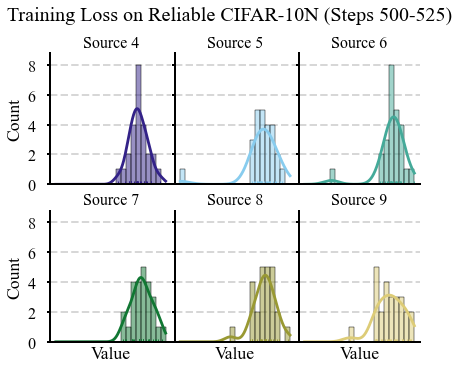

In [20]:
with graph_code.paper_theme():

    g = sns.displot(
        data=late_loss_reliable, 
        x='Value', 
        hue='Source', 
        col='Source', 
        #kind='kde', 
        kde=True,
        palette=graph_code.tol_muted[:6], 
        rug=True, 
        legend=False,
        col_wrap=3,
        aspect=0.8,
        height=width/0.8,
        )

    g.set(xticks=[])
    g.set_titles(
        "Source {col_name}",
        size=16,
        )
    g.fig.subplots_adjust(top=0.85, hspace=0.2)
    g.fig.suptitle(
        'Training Loss on Reliable CIFAR-10N (Steps 500-525)',
        fontsize=20,
        )
    g.fig.set_size_inches(width*0.75, width*0.7)
    
file_name = graph_outputs_file_path + 'CIFAR10N_loss_dis_reliable_500_525'
graph_code.save_fig(g.figure, file_name)

In [21]:
late_loss_unreliable = (results
    .query("tag.str.contains('Training Source Loss')"\
        " & Source in @unreliable_sources"\
        " & Step > 500"\
        " & Step <= 525"
        )
    .copy()
    )

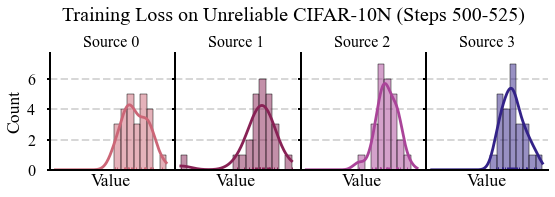

In [22]:
with graph_code.paper_theme():

    g = sns.displot(
        data=late_loss_unreliable, 
        x='Value', 
        hue='Source', 
        col='Source', 
        kde=True,
        palette=graph_code.tol_muted[6:] + [graph_code.tol_muted[0]], 
        rug=True, 
        legend=False,
        col_wrap=4,
        aspect=0.8,
        height=width/0.8,
        )


    g.set(xticks=[])
    g.set_titles(
        "Source {col_name}",
        size=16,
        )
    g.fig.subplots_adjust(top=0.85, hspace=0.2)
    g.fig.suptitle(
        'Training Loss on Unreliable CIFAR-10N (Steps 500-525)',
        fontsize=20,
        y=1.15,
        )

    g.fig.set_size_inches(width, width*0.3)

file_name = graph_outputs_file_path + 'CIFAR10N_loss_dis_unreliable_500_525'
graph_code.save_fig(g.figure, file_name)